## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 7
---------------------------------------

GOALS:

1. Answer all the questions from the lecture - we will use the scientists data and the grocery data.
2. Analyze data about College majors - your first EDA! (Think of this as a practice exam.)

----------------------------------------------------------

This homework has **9 Questions** and **A Practice Exam**

NOTE:
The practice exam is intended to give you an idea of what an exam in this class might feel like. Remember you will be expected to work on the exam **independently** and submit your work before we get together to work on the exam in class. **15\% of your Exam grade will come from what you can do independently** so start practicing now and get help if you need it!.

In [79]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Lecture Questions

First we will import the data about female scientists.

In [82]:
file1 = 'https://joannabieri.com/introdatascience/data/dates.csv'
DF_dates = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/professions.csv'
DF_professions = pd.read_csv(file2)
file3 = 'https://joannabieri.com/introdatascience/data/works.csv'
DF_works = pd.read_csv(file3)
show(DF_dates)
show(DF_professions)
show(DF_works)

**Q1** Are each of these data sets Tidy?

**Q2** Do they all contain the same number of observations?

**Q3** What are the five variables?

**Q4** What variable do they have in common - what can we join **on**

Q1: yes each of the data sets are tidy.
Q2: no, each data set contains different amounts of observations
Q3: These five variables are name, birth_year, death_year, known_for, and profession.
Q4: All of the variable are refering to people, each data set shares the variable name.


## Combining Three Data Sets

You need to think about the order and whether or not you want to keep the maximum number of names or only keep names that are in all the data frames.

In this case we will try to keep the maximal amount of data - the maximum number of names.

1. Combine the professions and works data
2. Then add the dates data

In [86]:
# 1. Combine the professions and works data
DF_scientists = pd.merge(DF_professions,DF_works,on='name',how='outer')
DF_scientists
# 2. Then add the dates data
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='outer')
DF_scientists

,name,profession,known_for,birth_year,death_year
0,Ada Lovelace,Mathematician,first computer algorithm,NaN,NaN
1,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912.0,1997.0
2,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947.0,NaN
3,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930.0,NaN
4,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897.0,1984.0
5,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964.0,NaN
6,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918.0,2020.0
7,Marie Curie,Physicist and Chemist,"theory of radioactivity, discovery of element...",NaN,NaN
8,Rosalind Franklin,Chemist,NaN,1920.0,1958.0
9,Vera Rubin,Astronomer,existence of dark matter,1928.0,2016.0


**Q5** What, if anything, would change if you switched to how='right'?

There are two more name variables.

## Combining Two Data Sets - You Try

**Q6** Write code that would combine the professions data and the dates data, but drop any names that don't appear in both.

In [91]:
# Your code here
Df_pw = pd.merge (DF_dates,DF_professions,on="name",how ="left")
Df_pw

,name,birth_year,death_year,profession
0,Janaki Ammal,1897,1984.0,Botanist
1,Chien-Shiung Wu,1912,1997.0,Physicist
2,Katherine Johnson,1918,2020.0,Mathematician
3,Rosalind Franklin,1920,1958.0,Chemist
4,Vera Rubin,1928,2016.0,Astronomer
5,Gladys West,1930,NaN,Mathematician
6,Flossie Wong-Staal,1947,NaN,Virologist and Molecular Biologist
7,Jennifer Doudna,1964,NaN,Biochemist


## Combining Three Data Sets - You Try

**Q7** Try to combine the three data sets together (professions, works, and dates) but instead of doing what we did above, see if you can keep only the names that appeared in all three data sets.

In [94]:
# Your code here
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='inner')
DF_scientists


,name,profession,known_for,birth_year_x,death_year_x,birth_year_y,death_year_y
0,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912.0,1997.0,1912,1997.0
1,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947.0,NaN,1947,NaN
2,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930.0,NaN,1930,NaN
3,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897.0,1984.0,1897,1984.0
4,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964.0,NaN,1964,NaN
5,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918.0,2020.0,1918,2020.0
6,Rosalind Franklin,Chemist,NaN,1920.0,1958.0,1920,1958.0
7,Vera Rubin,Astronomer,existence of dark matter,1928.0,2016.0,1928,2016.0


## Case study - Grocery Sales

Below you will load some data about grocery sales and see how joining or merging data can help us answer questions.

In [96]:
file1 = 'https://joannabieri.com/introdatascience/data/purchases.csv'
DF_purchases = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/prices.csv'
DF_prices = pd.read_csv(file2)
show(DF_purchases)
show(DF_prices)

## Calculate the total revenue

**Q8** Given the data above find the total revenue.

We will have to join the data frames so that we can see the price of what was sold. So first we look for a common column. In this case both data frames have **item** as a column.

Now, think about how to calculate revenue... we need to add up the total money we made, so we need to know the price of each thing sold.

**PAUSE - see if you can write some of the code for this before looking at the cells below**

In [99]:
#We will have to join the data frames so that we can see the price of what was sold. So first we look for a common column. 
#In this case both data frames have item as a column.
DF_revenue = pd.merge(DF_purchases, DF_prices,on='item',how='inner')
DF_revenue

,customer_id,item,price
0,1,bread,1.00
1,1,milk,0.80
2,1,banana,0.15
3,2,milk,0.80
4,2,toilet paper,3.00


In [100]:
#Now, think about how to calculate revenue...
#we need to add up the total money we made, 
#so we need to know the price of each thing sold.
DF_revenue['price'].sum()

5.75

**See the lecture notes if you need heelp figuring this out!**

**Q9** Calculate the revenue per customer? Hint - group by the customer id and then apply the sum().

In [103]:
#Calculate the revenue per customer? 
#Hint - group by the customer id and then apply the sum().
DF_cid = pd.merge(DF_purchases,DF_prices,on='item',how='inner')


# Practice Exam - EDA - College Majors

Your solutions should include code written to answer the questions AND words describing the results. For each problem:

1. Write code to get the answers. It is okay to copy and paste from our lecture notes or your homework assignments.
2. Describe what the code output is telling you.
3. Explain any interesting aspects of your results.

------------------------
-------------------------

The first step in the process of turning information into knowledge process is to summarize and describe the raw information - the data.
In this assignment we explore data on college majors and earnings, specifically the data begin the FiveThirtyEight story ["The Economic Guide To Picking A College Major"](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/).

These data originally come from the American Community Survey (ACS) 2010-2012 Public Use Microdata Series.
While this is outside the scope of this assignment, if you are curious about how raw data from the ACS were cleaned and prepared, see [the code](https://github.com/fivethirtyeight/data/blob/master/college-majors/college-majors-rscript.R) FiveThirtyEight authors used.

We should also note that there are many considerations that go into picking a major.
Earnings potential and employment prospects are two of them, and they are important, but they don't tell the whole story.
Keep this in mind as you analyze the data.

In [106]:
file_location = 'https://joannabieri.com/introdatascience/data/recent-grads.csv'
DF_raw = pd.read_csv(file_location)

In [108]:
DF_raw

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


### 1. Describe the data that you see here.

* How many variables?
* How man observations?
* Are the variables categorical or numerical?
* Are there any variables that you don't know what they mean? If so [CLICK HERE - to see the Git Repo for the data where the variables are defined](https://github.com/fivethirtyeight/data/tree/master/college-majors)


In [112]:
#
DF_raw.shape

(173, 21)

this data set has 173 observations and 21 variables.


the variables are a mix of numerical and categorical data. Major and Major_category are both categorical data while the rest is numerical.

**(Click Here to Explain your Results)**

### 2. Answer some questions about the data

* Which major has the lowest unemployment rate? Show a data frame that answers this question, but only show columns that are useful to the answer.
* Which major has the highest percentage of women? Show a data frame that answers this question, but only show columns that are useful to the answer.
* How do the distributions of median income compare across major categories?
    * First get a value count on what major categories are in the data. What categories are most or least represented?
    * Do some summary statistics using the .group_by() command to see the statistics for each major category.
    * Make a histogram that explores median income for each of the major categories (facet_col). How did you choose your number of bins?
    * Why do we often choose the median, rather than the mean, to describe the typical income of a group of people? Look this up online if you don't know the answer!
    * Answer the question: Which major category has the highest typical (you'll need to decide what this means) median income?

In [118]:
DF_raw.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [120]:
#Which major has the lowest unemployment rate? Show a data frame that answers this question, 
#but only show columns that are useful to the answer.
my_columns = ["Unemployment_rate", "Major"]
DF_raw[my_columns].sort_values("Unemployment_rate")

mask = DF_raw["Unemployment_rate"] >0
DF_new = DF_raw[mask]
DF_new[my_columns].sort_values("Unemployment_rate")

,Unemployment_rate,Major
14,0.006334,ENGINEERING MECHANICS PHYSICS AND SCIENCE
19,0.011690,COURT REPORTING
119,0.016203,MATHEMATICS TEACHER EDUCATION
0,0.018381,PETROLEUM ENGINEERING
64,0.019642,GENERAL AGRICULTURE
...,...,...
29,0.128426,PUBLIC POLICY
170,0.149048,CLINICAL PSYCHOLOGY
84,0.151850,COMPUTER NETWORKING AND TELECOMMUNICATIONS
89,0.159491,PUBLIC ADMINISTRATION


The major with the lowest unemployment rate is ENGINEERING MECHANICS PHYSICS AND SCIENCE.

In [123]:
#Do some summary statistics using the .group_by() 
#command to see the statistics for each major category.
some_cols = ['Rank','Total', 'Men', 'Women' , 'Major_category']
DF_raw[some_cols].groupby('Major_category').max()


,Rank,Total,Men,Women
Major_category,,,,
Agriculture & Natural Resources,162,21573.0,9658.0,16226.0
Arts,167,103480.0,32041.0,71439.0
Biology & Life Science,169,280709.0,111762.0,168947.0
Business,128,329927.0,173809.0,156118.0
Communications & Journalism,126,213996.0,70619.0,143377.0
Computers & Mathematics,106,128319.0,99743.0,32441.0
Education,173,170862.0,26893.0,157833.0
Engineering,67,91227.0,80320.0,20957.0
Health,164,209394.0,21773.0,187621.0


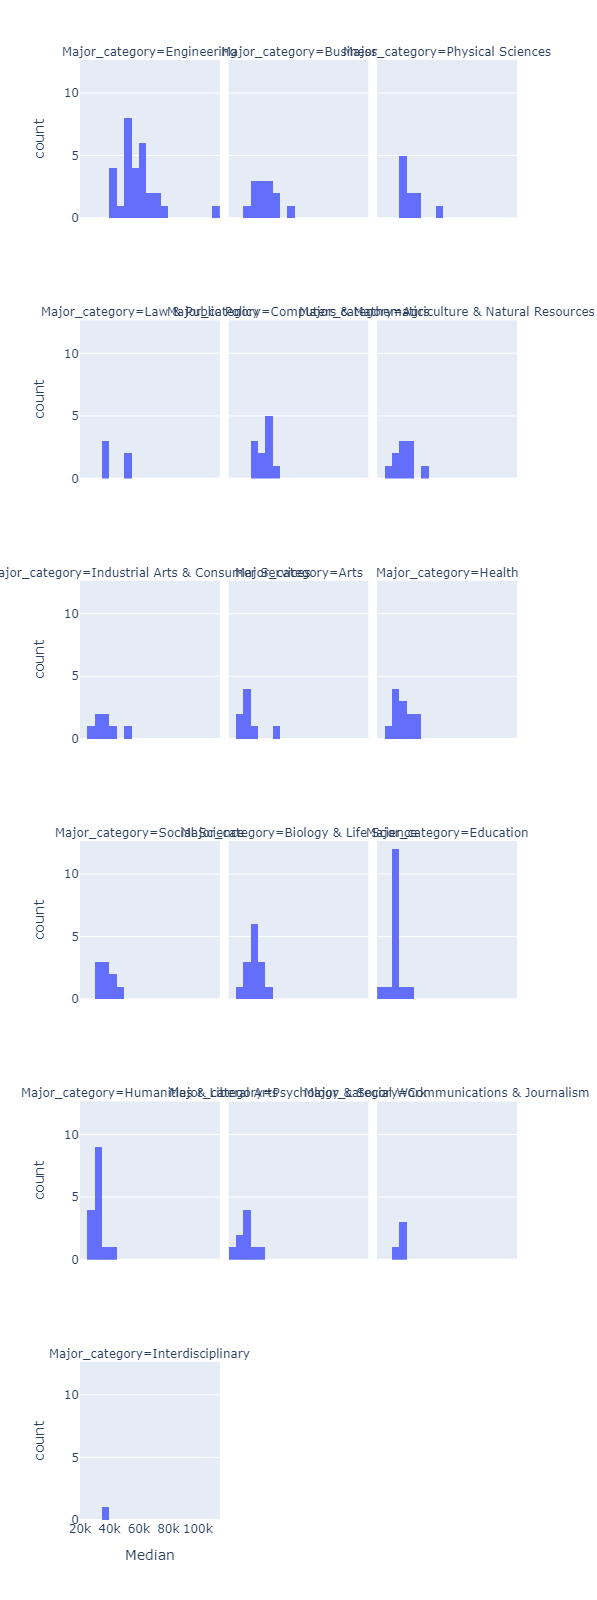

In [124]:
#  Make a histogram that explores median income for each of the major categories (facet_col). 
#  How did you choose your number of bins?

fig = px.histogram(DF_raw, 
                  x = 'Median',
                   nbins= 20,
                  facet_col= 'Major_category',
                  facet_col_wrap= 3,)
fig.update_layout(autosize= False,
                 width=800,
                 height=1600,)
                    

fig.show()

In [125]:
#Answer the question: Which major category has the highest typical 
#(you'll need to decide what this means) median income?

my_columns=['Major_category','Median','Total']
DF_raw[my_columns].groupby('Major_category').mean()

,Median,Total
Major_category,,
Agriculture & Natural Resources,36900.000000,8402.222222
Arts,33062.500000,44641.250000
Biology & Life Science,36421.428571,32418.714286
Business,43538.461538,100182.769231
Communications & Journalism,34500.000000,98150.250000
Computers & Mathematics,42745.454545,27182.545455
Education,32350.000000,34945.562500
Engineering,57382.758621,18537.344828
Health,36825.000000,38602.500000


**(Click Here to Explain your Results)**

### 3. More complicated questions

* Are all STEM fields the same in terms job opportunities?
    * Assume the following are STEM major categories
    
  ``` ["Biology & Life Science", "Computers & Mathematics", "Engineering","Physical Sciences"]```
  
    * Create a DataFrame (using a mask) so you only look at STEM majors.
    * Which STEM majors have median salaries equal to or less than the median for all majors' median earnings?
* What types of majors do women tend to major in?
    * Create a scatterplot of median income vs. proportion of women in that major, coloured by whether the major is in a STEM field or not.

In [170]:
#
mask = (DF_raw['Major_category']=="Biology & Life Science")|(DF_raw['Major_category']=="Computers & Mathematics")|(DF_raw['Major_category']=="Computers & Mathematics")|(DF_raw['Major_category']=="Engineering")|(DF_raw['Major_category']=="Physical Sciences")
DF_stem=DF_raw[mask]
show(DF_stem)


In [219]:
#
mask = (DF_raw['Women'])
DF_women=DF_raw[mask]
show(DF_women)

KeyError: "None of [Index([  282.0,    77.0,   131.0,   135.0, 11021.0,   373.0,  1667.0,   960.0,\n       10907.0, 16016.0,\n       ...\n       37054.0, 36422.0,  7732.0, 28809.0, 11931.0,  5359.0,  2332.0,  2270.0,\n        3695.0,   964.0],\n      dtype='float64', length=173)] are in the [columns]"

In [185]:
#
DF_raw.groupby(by=['Median']).sum()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Median,,,,,,,,,,,,,,,,,,,,
22000,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,593,237,410,87,0.104946,20000,22000,288,338,192
23400,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,19200,26000,2403,1245,308
25000,341,10403,EDUCATIONAL PSYCHOLOGYCLINICAL PSYCHOLOGY,5692.0,1090.0,4602.0,Psychology & Social WorkPsychology & Social Work,1.616958,20,4226,3572,1220,2504,516,0.214160,49000,74000,2474,1485,704
26000,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,20000,39000,2771,2947,743
27000,335,9303,DRAMA AND THEATER ARTSCOMPOSITION AND RHETORIC,62202.0,21462.0,40740.0,ArtsHumanities & Liberal Arts,1.295624,508,51218,35268,22606,24723,4380,0.159283,39200,70000,11849,33413,14534
27500,166,2603,OTHER FOREIGN LANGUAGES,11204.0,3472.0,7732.0,Humanities & Liberal Arts,0.690111,56,7052,5197,3685,3214,846,0.107116,22900,38000,2326,3703,1115
28000,492,13911,ANTHROPOLOGY AND ARCHEOLOGYCOMMUNICATION DISOR...,114712.0,13768.0,100944.0,Humanities & Liberal ArtsHealthEducation,2.644088,684,91947,67691,35378,48440,6242,0.190481,61000,113000,53277,33802,14859
29000,642,14308,THEOLOGY AND RELIGIOUS VOCATIONSSTUDIO ARTSCOS...,59182.0,28138.0,31044.0,Humanities & Liberal ArtsArtsIndustrial Arts &...,2.416964,633,48050,37290,16839,28242,3577,0.267624,84200,154400,14921,28754,10084
30000,1236,31827,FAMILY AND CONSUMER SCIENCESSOCIAL WORKANIMAL ...,189473.0,27351.0,162122.0,Industrial Arts & Consumer ServicesPsychology ...,6.525411,1619,155719,121569,51024,91657,10679,0.483873,180700,316000,75498,65601,18794


**(Click Here to Explain your Results)**

### 4. Ask a question of interest to you.

In [24]:
#

**(Click Here to Explain your Results)**